In [48]:
# Exploratory Data Analysis Libraries and 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

# Research Goal
The purpose behind this analysis is to evaluate uncertainty and attempt to build a generalized linear model to predict the presence of a cancerous cell.

In [49]:
# Load Data into Data Frame
import os
print(os.getcwd())

/Users/jscoran/Python_Projects


In [50]:
path="/Users/jscoran/Python_Projects"
os.chdir(path)
print(os.getcwd())

/Users/jscoran/Python_Projects


In [51]:
import pandas as pd
data = pd.read_csv('cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
# Construct DataFrame
column_names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean','fractal_dimension_mean']
df = pd.DataFrame(data=data, columns=column_names)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

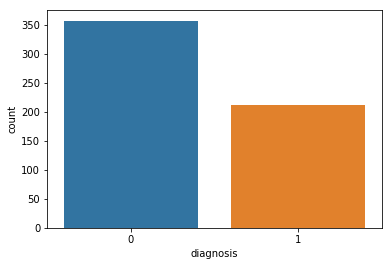

In [53]:
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes
sns.countplot(df.diagnosis)
df.diagnosis.value_counts(normalize=True)*100

In [54]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


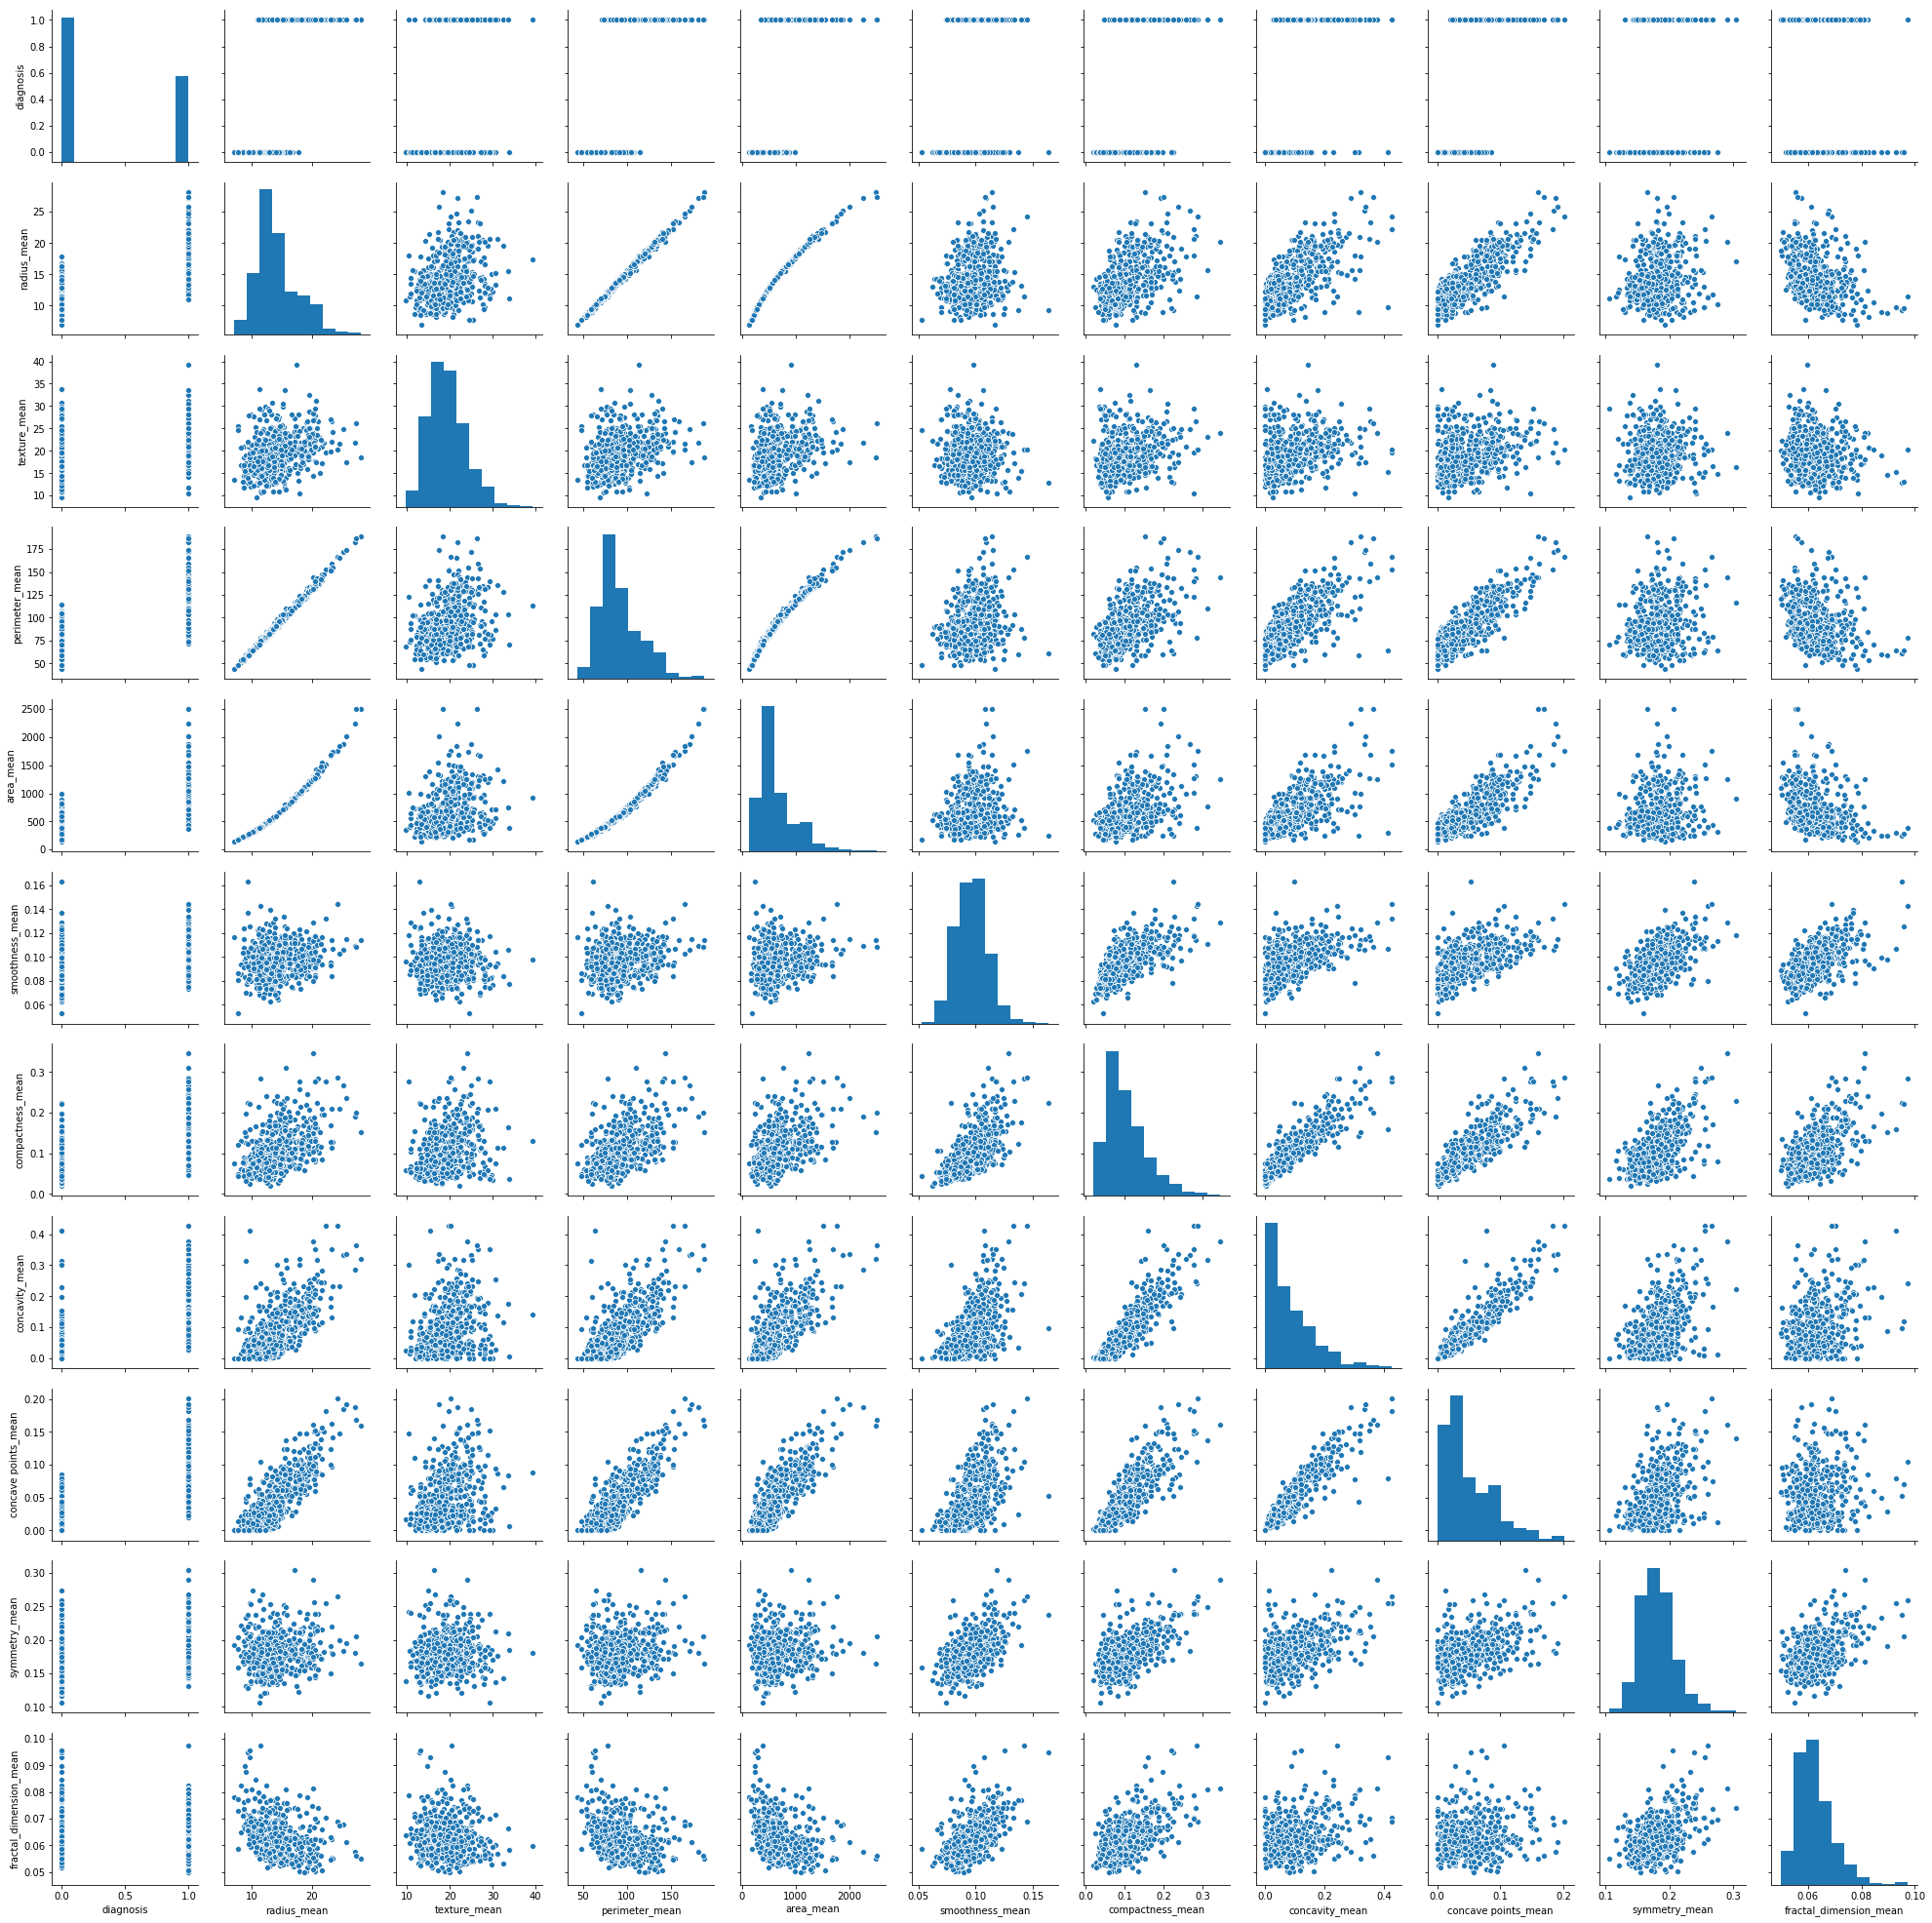

In [55]:
sns.pairplot(df)
plt.show()

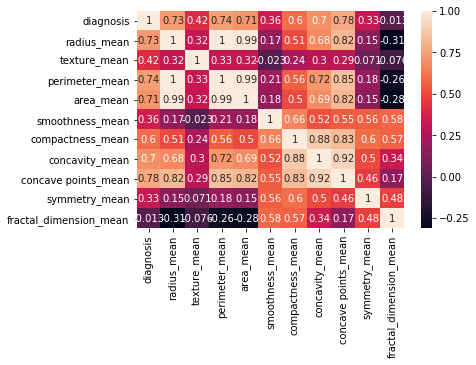

In [56]:
# Correlation Matrix

corr = df.corr()

# Heatmap of Correlations

sns.heatmap(corr, annot=True)

plt.show()

# Logistic Regression Model
I select two of the available features, smoothness & texture, and apply a logistic framework to create samples from. Under the PYMC3 framework, GLM allows for a patsy string along with the relationship of the variables. I'll be assuming a linear relationship between diagnosis status (Malignant or Benign). Within this model context, priors for the intercept, smoothness & texture are given a Normal distribution (0, 10^12). From the correlation matrix, these features seem to be the least correlated, reducing the likelihood that there will be issues during sampling. Separately, the choice of priors lets the data speak for itself. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [texture_mean, smoothness_mean, Intercept]
Sampling 4 chains: 100%|██████████| 18000/18000 [01:00<00:00, 297.74draws/s]
The number of effective samples is smaller than 25% for some parameters.


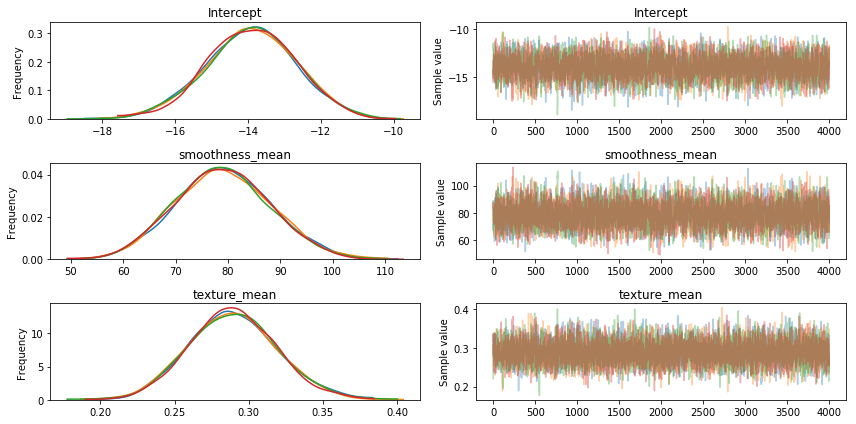

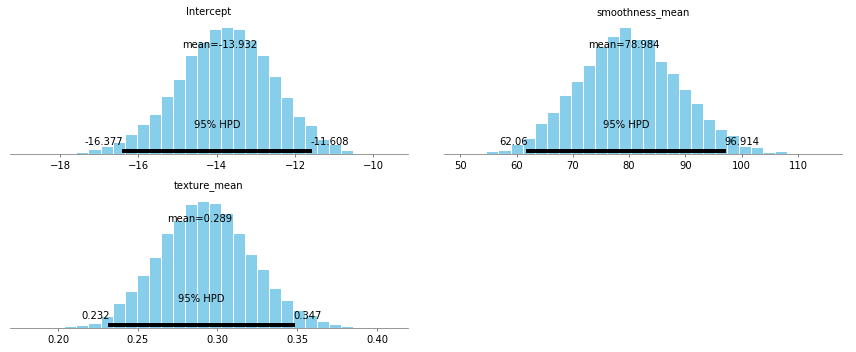

In [58]:
import pymc3 as pm

with pm.Model() as model:
    pm.glm.GLM.from_formula('diagnosis ~ smoothness_mean + texture_mean', df, family=pm.glm.families.Binomial())
    trace = pm.sample(4000)

    
pm.traceplot(trace)
pm.plot_posterior(trace)
plt.show()
    

# Modeling Uncertainty
Instead of one logistic function, we get many. The benefit of this framework is the modeling of uncertainty as evidenced by the width between the furthest most regression lines. This also highlights the ramifications of non-accepted parameters (via NUTS sampler) in which case the sample may not converge. You can see from the traces above texture doesn't give a smooth curve, and for the logistic regression below (since this is a 2-D relationship), we will need a fixed value for all but one of the coefficients. Ideally, the distance between the furthestmost estimates of the regression lines will be close, as this indicates that there is less uncertainty about the model.

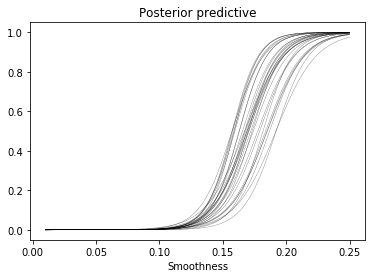

In [59]:
# Model uncertainty with fixed Texture Mean
lm = lambda x, samples: 1 / (1 + np.exp(-(samples['Intercept'] +
                                          samples['smoothness_mean']*x + samples['texture_mean'].mean())))
pm.plot_posterior_predictive_glm(trace, lm=lm, eval=np.linspace(0.01, 0.25, 1000))
plt.xlabel("Smoothness")
plt.show()                                          

In [60]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model)

100%|██████████| 500/500 [00:00<00:00, 1536.50it/s]


In [61]:
ppc

{'y': array([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 1],
        [1, 0, 1, ..., 1, 1, 0],
        [1, 0, 1, ..., 0, 1, 0]])}

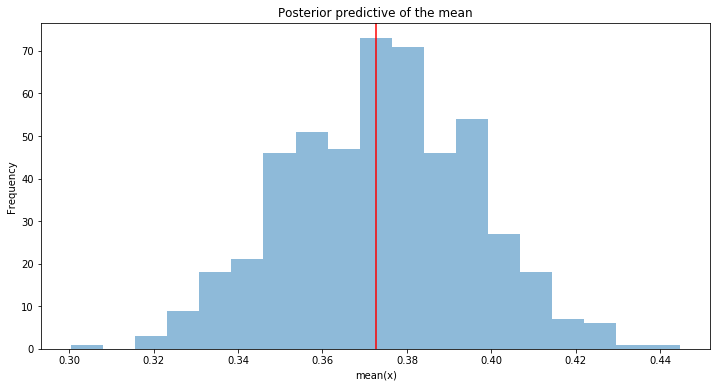

In [64]:
# Sample from the posterior
_, ax = plt.subplots(figsize=(12, 6))
ax.hist([n.mean() for n in ppc['y']], bins=19, alpha=0.5)
ax.axvline(df['diagnosis'].mean(), c='r')
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()

# Evaluating Evidence
Posterior Predictive Checks are useful for evaluating the performance of your model, and it also provides insight into the sampling mechanics. From my graph above, you can see the range of guesses, from as low as 30% Malignant to as high as 44% Malignant. The red line indicates actual prevalance of around 37.2%, which aligns with the peak of the sampling distributions. Although imperfect, this model does a reasonable job at producing effective ranges for discovery. 